In [1]:
import sknetwork as skn
from sknetwork.clustering import Leiden, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import visualize_graph
import networkx as nx  
import torch
from torch_geometric.utils import to_scipy_sparse_matrix, to_networkx
import os
import numpy as np
import pandas as pd
from IPython.display import SVG

/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
graph_dir = os.path.join('..','..', 'src', 'data', 'graph_data.pt')
graph = torch.load(graph_dir, weights_only=False)
data = graph['data']

# Extracting adjacency matrix from graph torch file
adjacency_matrix = to_scipy_sparse_matrix(data.edge_index)

# Extracting nodes position
G_nx = to_networkx(data, to_undirected=False)
pos = nx.spring_layout(G_nx)
positions = np.array([pos[i] for i in range(len(pos))])

In [ ]:
leiden = Leiden()
labels = leiden.fit_predict(adjacency_matrix)
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [1217  922  646  469  273  220  173  129  114   54    6    4    3    2
    2    2    2    2    2    2    2    2    2]


In [4]:
image = visualize_graph(adjacency_matrix, positions, labels=labels)
SVG(image)

In [5]:
get_modularity(adjacency_matrix, labels)

np.float64(0.5241261051917923)

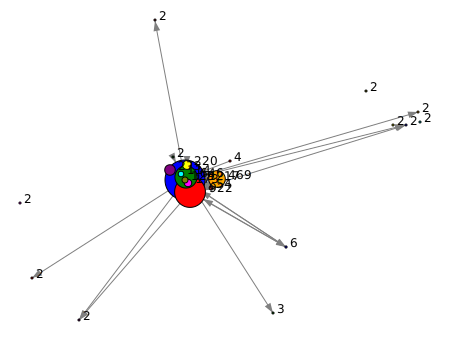

In [6]:
adjacency_aggregate = leiden.aggregate_
avg = normalize(get_membership(labels).T)
position_aggregate = avg.dot(positions)
labels_unique, counts = np.unique(labels, return_counts=True)

image = visualize_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique, display_node_weight=True, node_weights=counts)
SVG(image)